## Bin Packing

Imagine we have a lots of objects of various sizes, costs, shapes etc and we wish to pack them away in boxes. We can ask, how many boxes will this take? or if we perhaps only have a few boxes on hand, which objects we should put in them? These are known as bin packing problems and have practical uses in logistics, finance, and manufacturing. Despite being NP-Hard problems, they are heavily studied and have we are able so solve them efficiently through really clever heuristics. Here we will focus on applying linear programming to solving them.

If we have a bunch of objects of various sizes to pack, minimizing the number of boxes used gives us the classic 1-d bin packing problem. Variants exist for more dimensions but they are much harder to express.

In [40]:
from pulp import *
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

### 1. First lets make some fake data

In [41]:
items=['item_%d'%i for i in range(50)]

In [42]:
item_sizes = dict( (i,np.random.randint(1,20)) for i in items)

### The Model

Lets model the each possible bins as having at most N spots to be filled by item 0,...,N.

$$x_{i,b} = \begin{cases}
    1, & \text{if item i is in bin b } \\
    0, & \text{otherwise}
\end{cases}
$$

We need to make sure each item is placed in exactly one bin. Ie for any given item, summing $x_{i,b}$ along the bins should equal 1.

$$\sum_{b} x_{i,b} = 1 \ \forall i$$

We also need to make sure that if a bin is used, it is not used beyond its capacity. 

$$\sum_{i} x_{i,b} \leq \text{bin_capacity}*y_{b} \ \forall b$$

Finally, we are trying to minimize the number of needed bins, so our objective is:

$$\text{Minimize} \ \sum_{b} y_{b}$$

In [43]:
bin_size = 40

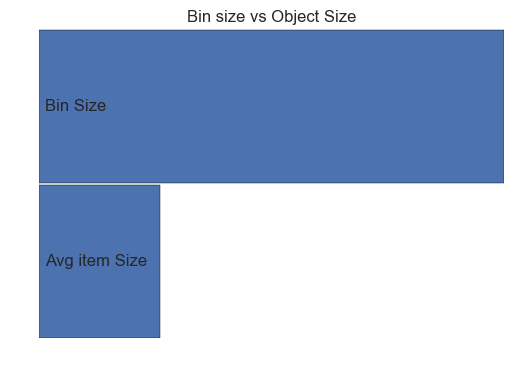

In [44]:
#average item size
avg_size = np.mean([ item_sizes[k] for k in item_sizes])
plt.barh([0,1],[avg_size,bin_size],height=.99)
plt.gca().text(.5,1.5,'Bin Size',verticalalignment='center', fontsize=12)
plt.gca().text(.5,0.5,'Avg item Size', verticalalignment='center', fontsize=12)
plt.ylim(0,2)
plt.gca().axis('off');
plt.title('Bin size vs Object Size')

In [45]:
bins = ['bin_%d'%i for i in range(len(items))]

In [46]:
x = LpVariable.dicts('x',[(i,b) for i in items for b in bins],0,1,LpBinary)

In [47]:
y = LpVariable.dicts('bin',bins,0,10, LpBinary)

In [48]:
#create the problme
prob=LpProblem("bin_packing",LpMinimize)

In [49]:
#the objective
cost = lpSum([ y[b] for b in bins])
prob+=cost

In [50]:
#every item is placed in exactly one bin
for i in items:
    prob+= lpSum([x[i,b] for b in bins]) == 1

In [51]:
#if a bin is used, it has a capacity constraint
for b in bins:
    prob+=lpSum([ item_sizes[i]*x[i,b] for i in items]) <= bin_size*y[b]

### Solve it!

In [52]:
%time prob.solve()
print(LpStatus[prob.status])

CPU times: user 65.2 ms, sys: 8.66 ms, total: 73.8 ms
Wall time: 3.11 s
Optimal


And the result:

In [53]:
print(value(prob.objective))

13.0


In [54]:
for b in bins:
    if value(y[b]) !=0:
        print(b,':',', '.join([ i for i in items if value(x[i,b]) !=0 ]))

bin_0 : item_19, item_20, item_27, item_33, item_48
bin_1 : item_1, item_3, item_13
bin_2 : item_5, item_11, item_23, item_43, item_45
bin_3 : item_0, item_16, item_31, item_41, item_42
bin_11 : item_7, item_29, item_36, item_39
bin_12 : item_15, item_22, item_28, item_44
bin_13 : item_9, item_32, item_46, item_47, item_49
bin_14 : item_2, item_12, item_25, item_35
bin_15 : item_6, item_8, item_26
bin_16 : item_14, item_17, item_38
bin_17 : item_18, item_37, item_40
bin_18 : item_21, item_24, item_30
bin_26 : item_4, item_10, item_34
